In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import transforms


train_dataset = datasets.MNIST(
    root = "../data/MNIST",
    train = True,
    download = True,
    transform = transforms.ToTensor())

test_dataset = datasets.MNIST(
    root = "../data/MNIST",
    train = False,
    transform = transforms.ToTensor())

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [3]:
import random
random.seed(42)
torch.manual_seed(42)
if device == "cuda":
    torch.cuda.manual_seed_all(42)

In [4]:
print('number of training data : ', len(train_dataset))
print('number of test data : ', len(test_dataset))

number of training data :  60000
number of test data :  10000


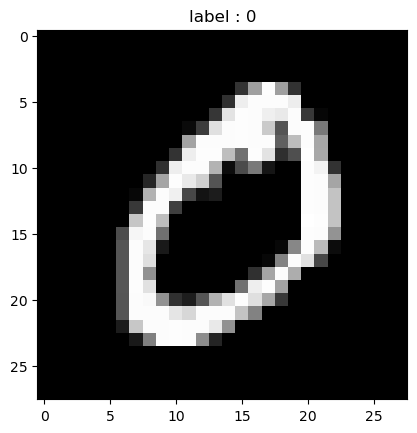

In [5]:
from matplotlib import pyplot as plt

image, label = train_dataset[1]
plt.imshow(image.squeeze(), cmap='gray')
plt.title('label : %s' % label)
plt.show()

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=100, shuffle=True)

In [7]:
from torch import nn

class Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_sotfmax_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.Sigmoid(),
            nn.Linear(512, 256),
            nn.Sigmoid(),
            nn.Linear(256, 128),
            nn.Sigmoid(),
            nn.Linear(128, 64),
            nn.Sigmoid(),
            nn.Linear(64, 32),
            nn.Sigmoid(),
            nn.Linear(32, 16),
            nn.Sigmoid(),
            nn.Linear(16, 10),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        outputs = self.linear_sotfmax_stack(x)
        return outputs
        

In [8]:
model = Perceptron().to(device)
print(model)

Perceptron(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_sotfmax_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): Sigmoid()
    (10): Linear(in_features=32, out_features=16, bias=True)
    (11): Sigmoid()
    (12): Linear(in_features=16, out_features=10, bias=True)
    (13): Sigmoid()
  )
)


In [9]:
# Install the torchsummary package
%pip install torchsummary

from torchsummary import summary
summary(model, (1, 28, 28))

Note: you may need to restart the kernel to use updated packages.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
           Sigmoid-3                  [-1, 512]               0
            Linear-4                  [-1, 256]         131,328
           Sigmoid-5                  [-1, 256]               0
            Linear-6                  [-1, 128]          32,896
           Sigmoid-7                  [-1, 128]               0
            Linear-8                   [-1, 64]           8,256
           Sigmoid-9                   [-1, 64]               0
           Linear-10                   [-1, 32]           2,080
          Sigmoid-11                   [-1, 32]               0
           Linear-12                   [-1, 16]             528
          Sigmoid-13                 

In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [11]:
def train_loop():
    model.train()
    for X, y in train_dataloader:
        X = X.to(device)
        y = y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    print(loss.item())


from  tqdm import tqdm
epochs = 100
for i in tqdm(range(epochs)):
    print(f"Epoch {i+1} \n------------------")
    train_loop()      

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1 
------------------


  1%|          | 1/100 [00:03<05:12,  3.15s/it]

2.309671640396118
Epoch 2 
------------------


  2%|▏         | 2/100 [00:06<05:07,  3.14s/it]

2.3030712604522705
Epoch 3 
------------------


  3%|▎         | 3/100 [00:09<05:12,  3.22s/it]

2.3090460300445557
Epoch 4 
------------------


  4%|▍         | 4/100 [00:12<05:14,  3.27s/it]

2.307840347290039
Epoch 5 
------------------


  5%|▌         | 5/100 [00:16<05:19,  3.36s/it]

2.2968990802764893
Epoch 6 
------------------


  6%|▌         | 6/100 [00:19<05:18,  3.39s/it]

2.294656753540039
Epoch 7 
------------------


  7%|▋         | 7/100 [00:23<05:15,  3.39s/it]

2.311263084411621
Epoch 8 
------------------


  8%|▊         | 8/100 [00:26<05:10,  3.38s/it]

2.327331304550171
Epoch 9 
------------------


  9%|▉         | 9/100 [00:31<05:35,  3.69s/it]

2.310976028442383
Epoch 10 
------------------


 10%|█         | 10/100 [00:34<05:30,  3.68s/it]

2.3009676933288574
Epoch 11 
------------------


 11%|█         | 11/100 [00:38<05:32,  3.74s/it]

2.3075459003448486
Epoch 12 
------------------


 12%|█▏        | 12/100 [00:42<05:29,  3.75s/it]

2.300977945327759
Epoch 13 
------------------


 13%|█▎        | 13/100 [00:46<05:25,  3.75s/it]

2.3028783798217773
Epoch 14 
------------------


 14%|█▍        | 14/100 [00:49<05:26,  3.79s/it]

2.3153913021087646
Epoch 15 
------------------


 15%|█▌        | 15/100 [00:53<05:19,  3.76s/it]

2.301157236099243
Epoch 16 
------------------


 16%|█▌        | 16/100 [00:57<05:14,  3.75s/it]

2.3125600814819336
Epoch 17 
------------------


 17%|█▋        | 17/100 [01:00<05:06,  3.69s/it]

2.3129656314849854
Epoch 18 
------------------


 18%|█▊        | 18/100 [01:04<05:10,  3.79s/it]

2.3108484745025635
Epoch 19 
------------------


 19%|█▉        | 19/100 [01:08<04:59,  3.70s/it]

2.2923738956451416
Epoch 20 
------------------


 20%|██        | 20/100 [01:12<04:52,  3.66s/it]

2.3005170822143555
Epoch 21 
------------------


 21%|██        | 21/100 [01:15<04:52,  3.70s/it]

2.298025131225586
Epoch 22 
------------------


 22%|██▏       | 22/100 [01:19<04:43,  3.63s/it]

2.305482864379883
Epoch 23 
------------------


 23%|██▎       | 23/100 [01:22<04:37,  3.60s/it]

2.2886314392089844
Epoch 24 
------------------


 24%|██▍       | 24/100 [01:26<04:41,  3.70s/it]

2.3063340187072754
Epoch 25 
------------------


 25%|██▌       | 25/100 [01:30<04:42,  3.77s/it]

2.29919171333313
Epoch 26 
------------------


 26%|██▌       | 26/100 [01:34<04:36,  3.73s/it]

2.299177646636963
Epoch 27 
------------------


 27%|██▋       | 27/100 [01:37<04:31,  3.71s/it]

2.316936492919922
Epoch 28 
------------------


 28%|██▊       | 28/100 [01:41<04:21,  3.64s/it]

2.3016748428344727
Epoch 29 
------------------


 29%|██▉       | 29/100 [01:44<04:15,  3.60s/it]

2.301628828048706
Epoch 30 
------------------


 30%|███       | 30/100 [01:48<04:11,  3.59s/it]

2.302316665649414
Epoch 31 
------------------


 31%|███       | 31/100 [01:52<04:07,  3.59s/it]

2.30460262298584
Epoch 32 
------------------


 32%|███▏      | 32/100 [01:55<04:01,  3.54s/it]

2.299405097961426
Epoch 33 
------------------


 33%|███▎      | 33/100 [01:59<03:59,  3.57s/it]

2.3031165599823
Epoch 34 
------------------


 34%|███▍      | 34/100 [02:02<03:53,  3.54s/it]

2.302509069442749
Epoch 35 
------------------


 35%|███▌      | 35/100 [02:06<03:58,  3.67s/it]

2.302212715148926
Epoch 36 
------------------


 36%|███▌      | 36/100 [02:10<03:54,  3.67s/it]

2.2983672618865967
Epoch 37 
------------------


 37%|███▋      | 37/100 [02:14<03:55,  3.73s/it]

2.3085548877716064
Epoch 38 
------------------


 38%|███▊      | 38/100 [02:17<03:50,  3.71s/it]

2.3025591373443604
Epoch 39 
------------------


 39%|███▉      | 39/100 [02:21<03:47,  3.73s/it]

2.3090882301330566
Epoch 40 
------------------


 40%|████      | 40/100 [02:25<03:44,  3.75s/it]

2.29777455329895
Epoch 41 
------------------


 41%|████      | 41/100 [02:29<03:39,  3.73s/it]

2.3081040382385254
Epoch 42 
------------------


 42%|████▏     | 42/100 [02:32<03:35,  3.71s/it]

2.2958290576934814
Epoch 43 
------------------


 43%|████▎     | 43/100 [02:36<03:28,  3.66s/it]

2.303985595703125
Epoch 44 
------------------


 44%|████▍     | 44/100 [02:39<03:23,  3.64s/it]

2.303751230239868
Epoch 45 
------------------


 45%|████▌     | 45/100 [02:43<03:18,  3.61s/it]

2.299715042114258
Epoch 46 
------------------


 46%|████▌     | 46/100 [02:47<03:14,  3.61s/it]

2.294614791870117
Epoch 47 
------------------


 47%|████▋     | 47/100 [02:50<03:09,  3.58s/it]

2.301330804824829
Epoch 48 
------------------


 48%|████▊     | 48/100 [02:54<03:04,  3.55s/it]

2.300699472427368
Epoch 49 
------------------


 49%|████▉     | 49/100 [02:57<03:01,  3.55s/it]

2.2988269329071045
Epoch 50 
------------------


 50%|█████     | 50/100 [03:01<02:58,  3.57s/it]

2.3061389923095703
Epoch 51 
------------------


 51%|█████     | 51/100 [03:04<02:55,  3.58s/it]

2.303288459777832
Epoch 52 
------------------


 52%|█████▏    | 52/100 [03:08<02:52,  3.59s/it]

2.3007113933563232
Epoch 53 
------------------


 53%|█████▎    | 53/100 [03:11<02:46,  3.55s/it]

2.2949345111846924
Epoch 54 
------------------


 54%|█████▍    | 54/100 [03:15<02:41,  3.50s/it]

2.302759885787964
Epoch 55 
------------------


 55%|█████▌    | 55/100 [03:18<02:38,  3.52s/it]

2.307421922683716
Epoch 56 
------------------


 56%|█████▌    | 56/100 [03:22<02:34,  3.52s/it]

2.307828664779663
Epoch 57 
------------------


 57%|█████▋    | 57/100 [03:25<02:31,  3.51s/it]

2.299511671066284
Epoch 58 
------------------


 58%|█████▊    | 58/100 [03:29<02:27,  3.52s/it]

2.299684524536133
Epoch 59 
------------------


 59%|█████▉    | 59/100 [03:33<02:25,  3.56s/it]

2.293949604034424
Epoch 60 
------------------


 60%|██████    | 60/100 [03:36<02:22,  3.56s/it]

2.3003485202789307
Epoch 61 
------------------


 61%|██████    | 61/100 [03:40<02:17,  3.54s/it]

2.2943482398986816
Epoch 62 
------------------


 62%|██████▏   | 62/100 [03:43<02:16,  3.58s/it]

2.2898874282836914
Epoch 63 
------------------


 63%|██████▎   | 63/100 [03:47<02:10,  3.53s/it]

2.297555923461914
Epoch 64 
------------------


 64%|██████▍   | 64/100 [03:50<02:09,  3.61s/it]

2.302851438522339
Epoch 65 
------------------


 65%|██████▌   | 65/100 [03:54<02:06,  3.62s/it]

2.2997171878814697
Epoch 66 
------------------


 66%|██████▌   | 66/100 [03:58<02:03,  3.63s/it]

2.2986884117126465
Epoch 67 
------------------


 67%|██████▋   | 67/100 [04:01<02:00,  3.65s/it]

2.30294132232666
Epoch 68 
------------------


 68%|██████▊   | 68/100 [04:05<01:58,  3.71s/it]

2.306443929672241
Epoch 69 
------------------


 69%|██████▉   | 69/100 [04:09<01:55,  3.71s/it]

2.300642728805542
Epoch 70 
------------------


 70%|███████   | 70/100 [04:13<01:53,  3.79s/it]

2.3070199489593506
Epoch 71 
------------------


 71%|███████   | 71/100 [04:17<01:48,  3.75s/it]

2.3024704456329346
Epoch 72 
------------------


 72%|███████▏  | 72/100 [04:20<01:43,  3.71s/it]

2.299523115158081
Epoch 73 
------------------


 73%|███████▎  | 73/100 [04:24<01:41,  3.76s/it]

2.307368516921997
Epoch 74 
------------------


 74%|███████▍  | 74/100 [04:28<01:35,  3.69s/it]

2.3032383918762207
Epoch 75 
------------------


 75%|███████▌  | 75/100 [04:32<01:33,  3.75s/it]

2.300083875656128
Epoch 76 
------------------


 76%|███████▌  | 76/100 [04:35<01:28,  3.68s/it]

2.2939586639404297
Epoch 77 
------------------


 77%|███████▋  | 77/100 [04:39<01:23,  3.62s/it]

2.2955799102783203
Epoch 78 
------------------


 78%|███████▊  | 78/100 [04:42<01:18,  3.59s/it]

2.294750928878784
Epoch 79 
------------------


 79%|███████▉  | 79/100 [04:46<01:14,  3.56s/it]

2.301194906234741
Epoch 80 
------------------


 80%|████████  | 80/100 [04:49<01:10,  3.55s/it]

2.308825731277466
Epoch 81 
------------------


 81%|████████  | 81/100 [04:53<01:07,  3.54s/it]

2.3026387691497803
Epoch 82 
------------------


 82%|████████▏ | 82/100 [04:56<01:03,  3.55s/it]

2.304046392440796
Epoch 83 
------------------


 83%|████████▎ | 83/100 [05:00<01:00,  3.57s/it]

2.2971136569976807
Epoch 84 
------------------


 84%|████████▍ | 84/100 [05:04<00:58,  3.68s/it]

2.306081771850586
Epoch 85 
------------------


 85%|████████▌ | 85/100 [05:07<00:54,  3.64s/it]

2.3043019771575928
Epoch 86 
------------------


 86%|████████▌ | 86/100 [05:11<00:51,  3.67s/it]

2.2991764545440674
Epoch 87 
------------------


 87%|████████▋ | 87/100 [05:15<00:47,  3.69s/it]

2.307742118835449
Epoch 88 
------------------


 88%|████████▊ | 88/100 [05:18<00:43,  3.60s/it]

2.299795627593994
Epoch 89 
------------------


 89%|████████▉ | 89/100 [05:22<00:39,  3.57s/it]

2.3060038089752197
Epoch 90 
------------------


 90%|█████████ | 90/100 [05:25<00:35,  3.52s/it]

2.302570104598999
Epoch 91 
------------------


 91%|█████████ | 91/100 [05:29<00:31,  3.52s/it]

2.296130895614624
Epoch 92 
------------------


 92%|█████████▏| 92/100 [05:32<00:28,  3.54s/it]

2.304485321044922
Epoch 93 
------------------


 93%|█████████▎| 93/100 [05:36<00:24,  3.57s/it]

2.302929162979126
Epoch 94 
------------------


 94%|█████████▍| 94/100 [05:40<00:21,  3.67s/it]

2.3054919242858887
Epoch 95 
------------------


 95%|█████████▌| 95/100 [05:43<00:18,  3.62s/it]

2.291738986968994
Epoch 96 
------------------


 96%|█████████▌| 96/100 [05:47<00:14,  3.56s/it]

2.3071842193603516
Epoch 97 
------------------


 97%|█████████▋| 97/100 [05:50<00:10,  3.55s/it]

2.295802116394043
Epoch 98 
------------------


 98%|█████████▊| 98/100 [05:54<00:07,  3.55s/it]

2.3036892414093018
Epoch 99 
------------------


 99%|█████████▉| 99/100 [05:57<00:03,  3.56s/it]

2.30694580078125
Epoch 100 
------------------


100%|██████████| 100/100 [06:01<00:00,  3.61s/it]

2.297419548034668


In [12]:
# def test_loop():
#     model.eval()

#     for X, y in test_dataloader:
#         X = X.to(device)
#         y = y.to(device)

#         with torch.no_grad():
#             pred = model(X)
        
#         print(pred.argmax(1)[0],y[0])
#         # correct = (pred.argmax(1) == y).type(torch.float).sum().item() / len(y)
#         # print(correct*100)
        
# test_loop()


In [13]:
def test_loop():
    model.eval()  # 평가 모드 설정

    total_correct = 0
    total_samples = 0
    true_positives = torch.zeros(10)  # 각 클래스별 True Positive
    false_positives = torch.zeros(10)  # 각 클래스별 False Positive
    false_negatives = torch.zeros(10)  # 각 클래스별 False Negative

    for X, y in test_dataloader:
        X = X.to(device)
        y = y.to(device)

        with torch.no_grad():  # 기울기 계산 비활성화
            pred = model(X)  # 모델 예측
            preds = pred.argmax(1)  # 가장 높은 확률의 클래스 선택

            # Accuracy 계산
            total_correct += (preds == y).sum().item()
            total_samples += y.size(0)

            # F1-Score 계산용: TP, FP, FN 갱신
            for cls in range(10):  # 클래스 수가 10 (MNIST)
                true_positives[cls] += ((preds == cls) & (y == cls)).sum().item()
                false_positives[cls] += ((preds == cls) & (y != cls)).sum().item()
                false_negatives[cls] += ((preds != cls) & (y == cls)).sum().item()

    # Accuracy 계산
    accuracy = total_correct / total_samples
    print(f"Accuracy: {accuracy:.2f}")

    # 전체 데이터 개수 중 몇 개를 맞췄는지 출력
    print(f"Correct: {total_correct}/{total_samples}")

    # F1-Score 계산
    f1_scores = []
    for cls in range(10):
        precision = true_positives[cls] / (true_positives[cls] + false_positives[cls] + 1e-8)
        recall = true_positives[cls] / (true_positives[cls] + false_negatives[cls] + 1e-8)
        f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
        f1_scores.append(f1.item())

    macro_f1 = sum(f1_scores) / len(f1_scores)  # 매크로 F1 스코어
    print(f"F1 Score (Macro): {macro_f1:.2f}")

test_loop()


Accuracy: 0.11
Correct: 1135/10000
F1 Score (Macro): 0.02


In [14]:
torch.set_printoptions(sci_mode=False)

pred:  1 label: 5
tensor([[53.0328, 63.0088, 52.6988, 54.7498, 51.6295, 46.5207, 53.9182, 56.2038,
         48.1474, 47.6467]], device='cuda:0', grad_fn=<MulBackward0>)


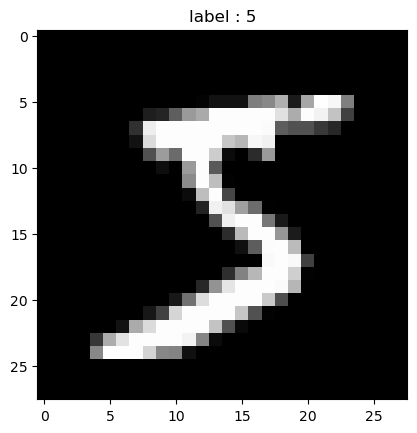

In [15]:
image, label = train_dataset[0]
pred = model(image.to(device))*100
print('pred: ',pred.argmax(1)[0].cpu().numpy(), 'label:',label)
print(pred)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('label : %s' % label)
plt.show()

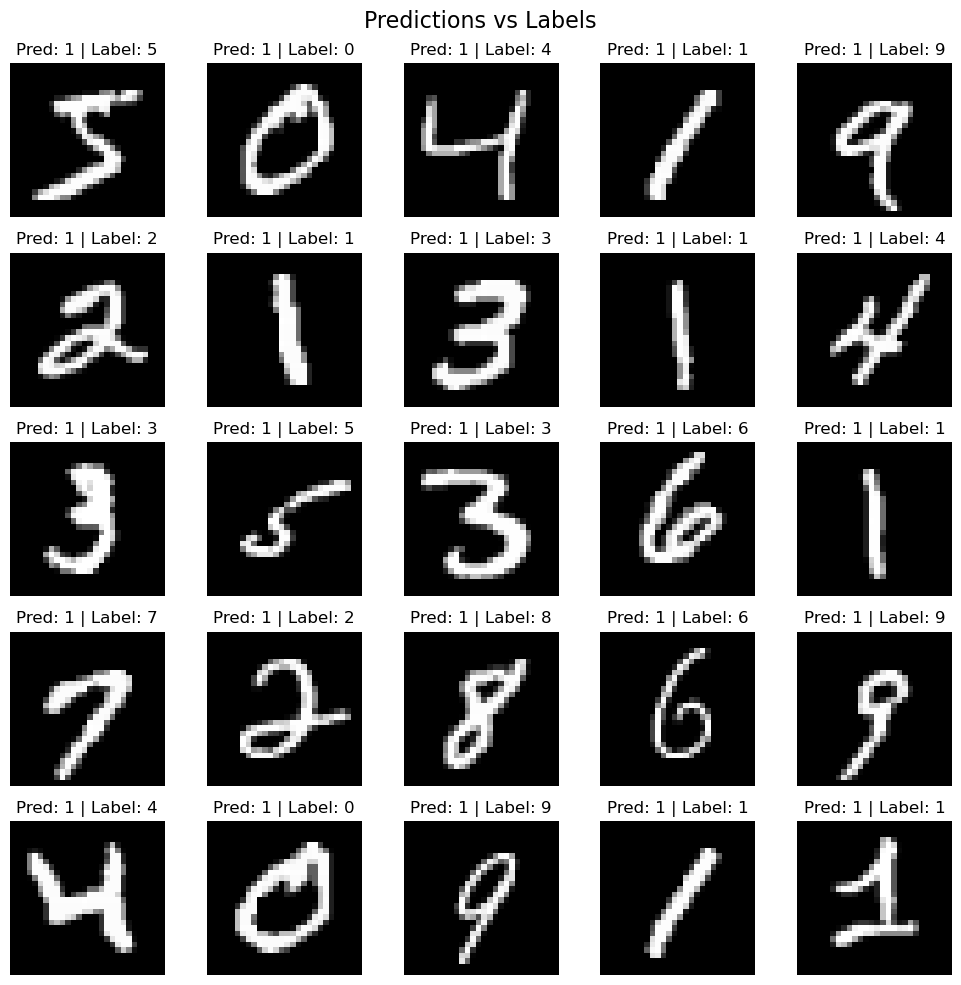

In [16]:
import torch
import matplotlib.pyplot as plt

# 1. 데이터셋에서 25개 샘플 가져오기
images, labels = zip(*[train_dataset[i] for i in range(25)])  # 첫 25개 샘플
images = torch.stack(images)  # 텐서로 변환
labels = torch.tensor(labels)  # 정답 레이블

# 2. 모델 예측
model.eval()
with torch.no_grad():
    preds = model(images.to(device))  # 모델 예측
    pred_labels = preds.argmax(1).cpu()  # 예측 클래스

# 3. 5x5 그리드로 이미지와 예측값 시각화
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
fig.suptitle('Predictions vs Labels', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')  # 이미지 표시
    ax.set_title(f'Pred: {pred_labels[i].item()} | Label: {labels[i].item()}')
    ax.axis('off')  # 축 숨기기

plt.tight_layout()
plt.show()


In [17]:
import torch
import torchvision
import sys

print("Python Version:", sys.version)
print("PyTorch Version:", torch.__version__)
print("Torchvision Version:", torchvision.__version__)
print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA Version:", torch.version.cuda)
    print("GPU Name:", torch.cuda.get_device_name(0))


Python Version: 3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]
PyTorch Version: 2.5.1
Torchvision Version: 0.20.1
CUDA Available: True
CUDA Version: 12.4
GPU Name: NVIDIA GeForce RTX 4060 Ti
